In [119]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

/var/folders/p1/z8dhpprj11b1w1rsyp3fh4zr0000gn/T/ipykernel_18363/3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [120]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [121]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

In [122]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [123]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

In [124]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [125]:
customer_data.count()

customer_id                        542000
average_monthly_spend              542000
average_monthly_visit_frequency    542000
average_monthly_basket_size        542000
dtype: int64

In [126]:
# Check for duplicates
duplicate_rows = customer_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 3053


In [127]:
# Remove duplicates
customer_data.drop_duplicates(inplace=True)

In [128]:
customer_data.count()

customer_id                        538947
average_monthly_spend              538947
average_monthly_visit_frequency    538947
average_monthly_basket_size        538947
dtype: int64

In [129]:
# Check for outliers and handle them if necessary
# (e.g., using z-score or IQR method)

In [130]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data[col]) for col in customer_data.columns}
print(mixed_type_columns)


{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [131]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_spend'])
print(type_breakdown)


average_monthly_spend
float    414388
str      124559
Name: count, dtype: int64


In [132]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_spend'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_spend':", mask.sum())

Number of string entries in 'average_monthly_spend': 124559


In [133]:
customer_data_str = customer_data[mask]

In [134]:
customer_data_str

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04
5,6,172333,14.16,35.06
...,...,...,...,...
131067,131068,31059,4.28,9.07
131068,131069,20515,5.56,9.96
131069,131070,32446,7.11,10.58
131070,131071,167134,15.33,31.16


In [135]:
customer_data_str['average_monthly_spend'][0]

'790'

In [136]:
customer_data_int = customer_data[~mask]

In [137]:
customer_data_int

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80
...,...,...,...,...
569991,234632,89150.0,10.87,38.31
569996,215276,141241.0,15.47,31.13
569997,11515,9183.0,2.09,4.61
569998,205260,35541.0,4.22,9.65


In [138]:
# Drop rows where 'average_monthly_visit_frequency' contains strings
customer_data = customer_data[~mask]

# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_spend'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_spend
<class 'float'>    414388
Name: count, dtype: int64


In [139]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)

average_monthly_visit_frequency
float    249024
str      165364
Name: count, dtype: int64


In [140]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_visit_frequency'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_visit_frequency':", mask.sum())

Number of string entries in 'average_monthly_visit_frequency': 165364


In [141]:
# Drop rows where 'average_monthly_visit_frequency' contains strings
customer_data = customer_data[~mask]

# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_visit_frequency'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_visit_frequency
<class 'float'>    249024
Name: count, dtype: int64


In [142]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80
...,...,...,...,...
524283,524284,7354.0,1.51,3.40
524284,524285,33749.0,5.38,9.34
524285,524286,162412.0,14.47,27.27
524286,524287,103826.0,9.59,37.13


In [143]:
customer_data.describe()

,customer_id,average_monthly_basket_size
count,249024.000000,249024.000000
mean,327807.517231,13.276089
std,136434.276371,12.007761
min,131073.000000,0.000000
25%,196671.750000,3.790000
50%,393337.500000,9.790000
75%,458840.250000,17.500000
max,524288.000000,39.990000


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

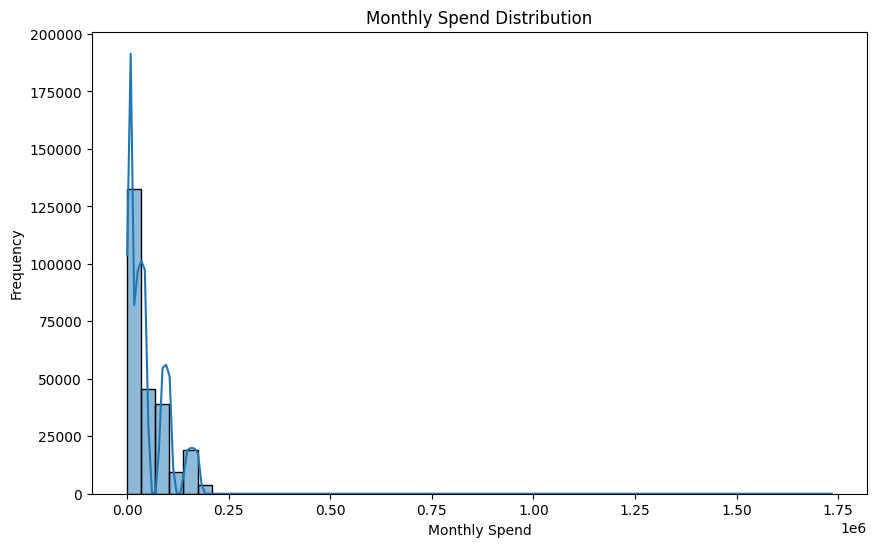

In [145]:
    # Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['average_monthly_spend'], bins=50, kde=True)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.show()

In [146]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80


In [147]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features

# Derived metrics (if needed)
# e.g., customer_data['spend_per_visit'] = customer_data['monthly_spend'] / customer_data['monthly_visit_frequency']


In [94]:
# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

# Evaluate clustering performance
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']], customer_data['cluster'])
print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.748362944482383
